# Maitri Patel

## CSc 447- Intro to Machine Learning

## Final Project- Walmart Sales Analysis and Prediction

For my project, I am going to analyze and predict sales patterns of one of the leading retail corporations - Walmart. The dataset has been retrieved from Kaggle and ranges from 2010 to 2012. While researching, I came to know that as a part of recent recruiting effort, Walmart released anonymized weekly sales data of 45 stores located in different regions and asked the candidates to predict future sales. Since it was anonymized, we don't have a proper address for any stores and hence we will address the stores numerically throughout the project. The dataset contains information about the stores, temperature, unemployment, CPI, Holiday, fuel price, and Weekly sales.

The purpose of this project is to show how simple Machine Learning algorithms can forecast the sales which can help avoid the challenges like running out of stock due to unforeseen demands.

First I'll import the necessary packages, along with downloading and cleaning the data.


In [366]:
import csv
import numpy as np 
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
%matplotlib inline
from matplotlib import style
style.use('ggplot')
import seaborn as sns
import math
from sklearn.metrics import confusion_matrix, r2_score, mean_squared_error
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from scipy import stats
from scipy.stats import probplot
from statistics import mean, stdev
from statsmodels.tsa.arima_model import ARIMA
import datetime as dt
from hpsklearn import HyperoptEstimator
from hpsklearn import any_regressor
from hpsklearn import any_preprocessing
from hyperopt import tpe
import plotly.express as px

In [367]:
df = pd.read_csv(r"C:\Users\mpate\OneDrive\Desktop\CSC44700\archive\Walmart_Store_sales.csv")
df 

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,5/2/2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12/2/2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,5/3/2010,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,5/10/2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12/10/2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667


# Cleaning the Data

In [255]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


All the columns are in numerical type.

In [59]:
# checking to see if there are any null values
df.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

There are no missing values in the dataset so we won't need to drop any values!

# Exploratory Analyses

In [256]:
# to calculate some statistical data like percentile, mean and std of the dataframe
df.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


{'whiskers': [<matplotlib.lines.Line2D at 0x1caa5834220>,
 'caps': [<matplotlib.lines.Line2D at 0x1caa58348e0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1caa5827e80>],
 'medians': [<matplotlib.lines.Line2D at 0x1caa5834fa0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1caa583c2e0>],
 'means': []}

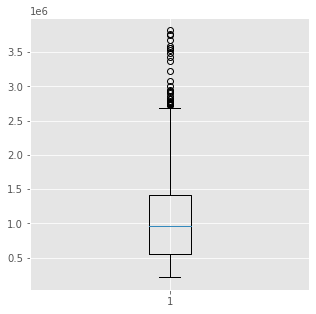

In [124]:
#Plot a Boxplot to see where the most concentration of the weekly sales lie and to see if there are any outliers
fig = plt.figure(figsize=(5,5))
plt.boxplot(df['Weekly_Sales'])

In [62]:
#anything above this are the outliers
np.percentile(df['Weekly_Sales'], q=75) + (np.percentile(df['Weekly_Sales'], q=75) - np.percentile(df['Weekly_Sales'], q=25)) * 1.5

2720371.4924999997

In [63]:
b = df['Weekly_Sales'] > 2720371.4924999997
a = b[b == True]
print (a)
print ("Number of stores as outliers" , len(a))

189     True
241     True
471     True
474     True
475     True
523     True
526     True
527     True
761     True
1329    True
1332    True
1333    True
1381    True
1385    True
1758    True
1761    True
1762    True
1810    True
1813    True
1814    True
1901    True
1904    True
1905    True
1957    True
2759    True
2761    True
2762    True
2763    True
2811    True
2814    True
2815    True
3192    True
3764    True
3816    True
Name: Weekly_Sales, dtype: bool
Number of stores as outliers 34


From the boxplot, we can see that there are 34 stores out of 6435 whose weekly sales were above 75th percentile. Hence we can say that did exceptionally well in terms of sales.

In [64]:
#anything below this is an outlier
np.percentile(df['Weekly_Sales'], q=25) - (np.percentile(df['Weekly_Sales'], q=75) - np.percentile(df['Weekly_Sales'], q=25)) * 1.5

-746862.7275

Any store which has weekly sales below this number would have undergone extremely poor sales. But we don't have any such store !

### Which store has maximum sales?

In [320]:
df.groupby('Store')['Weekly_Sales'].max().sort_values(ascending=False).head()

Store
14    3818686.45
20    3766687.43
10    3749057.69
4     3676388.98
13    3595903.20
Name: Weekly_Sales, dtype: float64

Store 14 has maximum weekly sales.

### Let's see which Store has maximum deviations in weekly sales?

In [126]:
std_devs = []
total_stores = df['Store'].nunique()
for store in range(1,int(total_stores)+1):
    values = df[df['Store']==store]['Weekly_Sales'].values
    sd = np.std(values)
    std_devs.append(sd)
    
max_std_dev = max(std_devs)
print("Store with maximum standard deviation: Store",std_devs.index(max_std_dev)+1)

Store with maximum standard deviation: Store 14


### Which store has good quarterly growth rate in Q3’2012?

In [128]:
qtr_profits =[]
for store in range(1,int(total_stores)+1):
    values = df[(df['Store']==store) & (df['Date']> '2012-06-01') & (df['Date']<'2012-09-01')]['Weekly_Sales'].values
    qtr_profits.append(np.mean(values))
    
print("Store with maximum profit in Q3’2012: Store",qtr_profits.index(max(qtr_profits))+1)

Store with maximum profit in Q3’2012: Store 1


## Are more products sold in hotter weather?


Let's find an answer using CDFs (cumulative distribution functions) and correlations. We will use CDF as we are analyzing a general distribution.

## Defining CDF

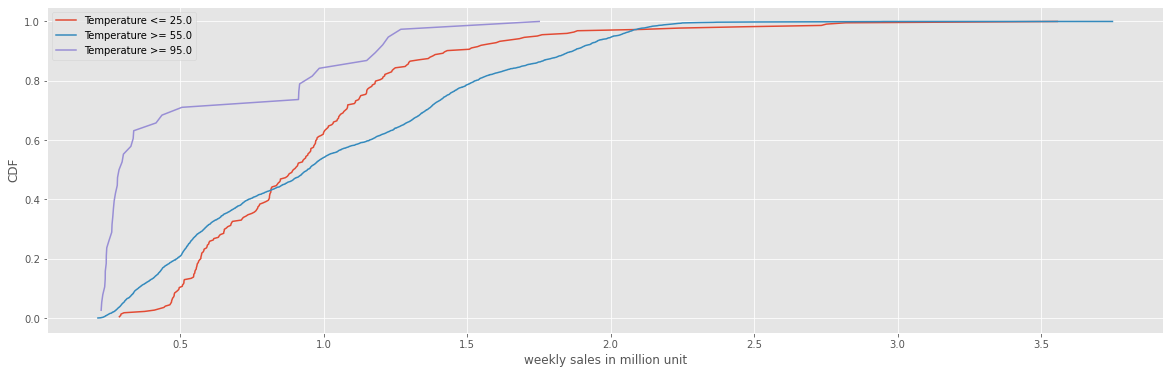

In [129]:
def EvalCdf(sample, x):
    count = 0
    for i in sample:
        if i <= x:
            count += 1
    prob = count / len(sample)
    return prob

# assuming that the temperature is in degree farenheight

temp3 = df[df.Temperature <= 25.0]
temp3_sales = sorted(temp3.Weekly_Sales.values / 10**6)
temp3_sales_cdf = [EvalCdf(temp3_sales, x) for x in temp3_sales]

temp4 = df[df.Temperature >= 55.0]
temp4_sales = sorted(temp4.Weekly_Sales.values / 10**6)
temp4_sales_cdf = [EvalCdf(temp4_sales, x) for x in temp4_sales]

temp5 = df[df.Temperature >= 95.0]
temp5_sales = sorted(temp5.Weekly_Sales.values / 10**6)
temp5_sales_cdf = [EvalCdf(temp5_sales, x) for x in temp5_sales]

plt.figure(figsize = (20, 6))

plt.xlabel('weekly sales in million unit')
plt.ylabel('CDF')
plt.plot(temp3_sales, temp3_sales_cdf, label = 'Temperature <= 25.0')
plt.plot(temp4_sales, temp4_sales_cdf, label = 'Temperature >= 55.0')
plt.plot(temp5_sales, temp5_sales_cdf, label = 'Temperature >= 95.0')

plt.legend()

What does the graph depict?

The moderate climate is more preferable for selling huge amounts of goods.

## Sales with and without holidays

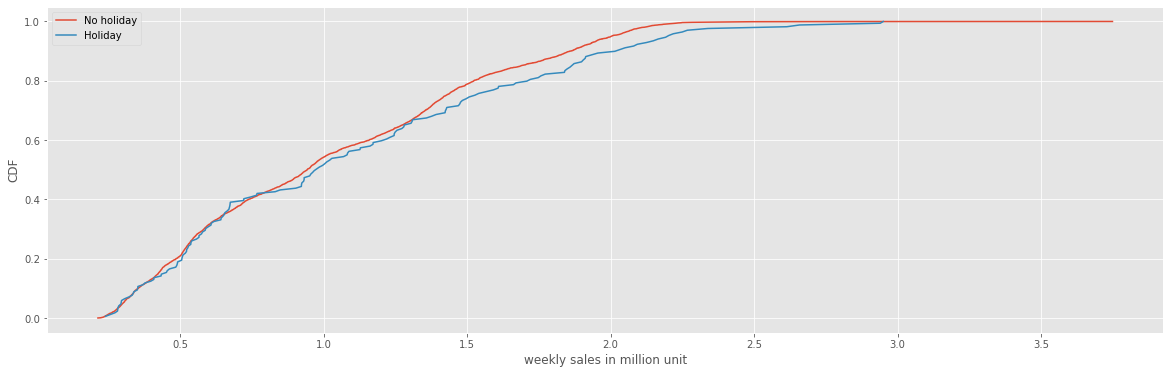

In [130]:
temp3 = df.query('Temperature >= 55.0 and Holiday_Flag == 0')
temp3_sales = sorted(temp3.Weekly_Sales.values / 10**6)
temp3_sales_cdf = [EvalCdf(temp3_sales, x) for x in temp3_sales]

temp4 = df.query('Temperature >= 55.0 and Holiday_Flag == 1')
temp4_sales = sorted(temp4.Weekly_Sales.values / 10**6)
temp4_sales_cdf = [EvalCdf(temp4_sales, x) for x in temp4_sales]

plt.figure(figsize = (20, 6))

plt.xlabel('weekly sales in million unit')
plt.ylabel('CDF')
plt.plot(temp3_sales, temp3_sales_cdf, label = 'No holiday')
plt.plot(temp4_sales, temp4_sales_cdf, label = 'Holiday')

plt.legend()

### Holidays which have higher sales than the mean sales in non-holiday season for all stores together

In [131]:
non_holiday_sales = df[df['Holiday_Flag']==0]['Weekly_Sales'].mean()
df_v1 = pd.DataFrame(df[df['Holiday_Flag']==1].groupby('Date')['Weekly_Sales'].mean())
print(df_v1[df_v1['Weekly_Sales'] > non_holiday_sales])

            Weekly_Sales
Date                    
10/2/2012   1.111320e+06
11/2/2011   1.051915e+06
12/2/2010   1.074148e+06
25-11-2011  1.479858e+06
26-11-2010  1.462689e+06
7/9/2012    1.074001e+06


### Which store has highest sales in holiday?

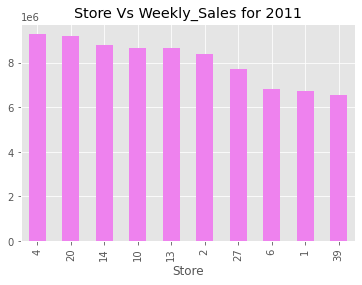

In [281]:
#Converting date column to datetime type
df['Date'] = pd.to_datetime(df['Date'])
df['year'] = pd.DatetimeIndex(df['Date']).year
df['month'] = pd.DatetimeIndex(df['Date']).month

df_v1 = df[(df['Holiday_Flag'] == 1)&(df['year']==2011) ]
df_v1.groupby('Store')['Weekly_Sales'].sum().sort_values(ascending = False).head(10).plot.bar(color='violet', title = 'Store Vs Weekly_Sales for 2011')

Clearly Store 4 has the highest weekly sales in the year 2011. We can check it similarly for the rest of the years.

## Defining correlation

In [133]:
def de_mean(x):
    x_bar = mean(x)
    return [x_i - x_bar for x_i in x]

def covariance(x, y):
    n = len(x)
    return np.dot(de_mean(x), de_mean(y)) / (n - 1)

def correlation(x, y):
    std_x = stdev(x)
    std_y = stdev(y)
    if std_x > 0 and std_y > 0:
        return covariance(x, y) / std_x / std_y
    else:
        return 0
    
x = df.Unemployment.values
y = df.Weekly_Sales.values
z = df.CPI.values
a = df.Fuel_Price.values
b = df.Temperature.values

In [80]:
correlation(y, z)

-0.0726341620401763

A negative correlation suggests the inverse realtionship between our variables.

The value of correlation coefficient lies between -1 to +1. The value of -1 and +1 indicates a strong perfect relation between the variables. As the value nears the 0, the relation becomes weaker. (+) sign indicates a positive relation and (-) sign indicates negative/inverse relation. 

## Correlation matrix

checking if our correlation algorithm gives the same results as that of the correlation matrix

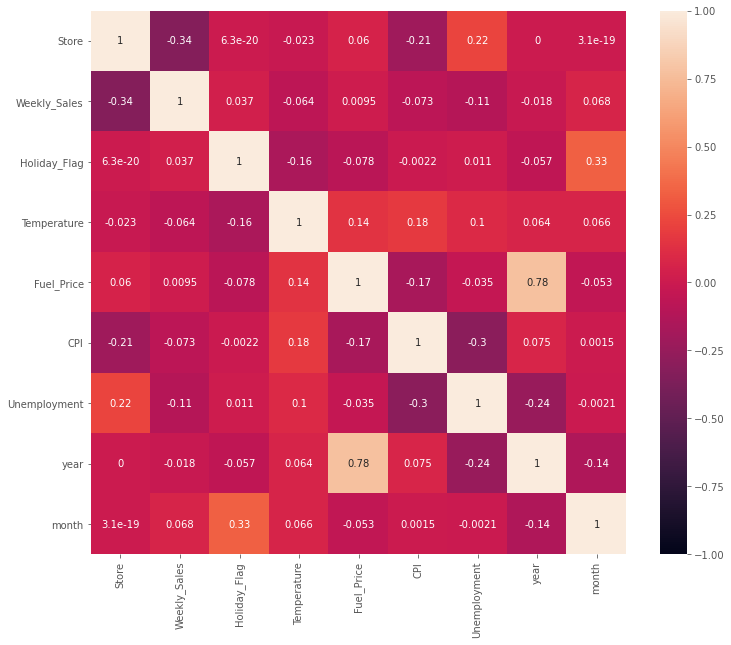

In [97]:
cor = df.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(cor, annot=True, vmin=-1.0,)
plt.show()

## Predicting weekly sales for all the stores

In [282]:
df['Day']=df['Date'].dt.day
df = df.drop('Date',axis=1)

df_v2 = pd.get_dummies(df, columns = ['Holiday_Flag','Store'])
y = df_v2['Weekly_Sales']
X= df_v2.drop('Weekly_Sales',axis=1)

In [135]:
# split data into 80% training and 20% test data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

ln_model = LinearRegression()
ln_model.fit(X_train,y_train)
y_pred = ln_model.predict(X_test)
print("r-squared value:",r2_score(y_test,y_pred))

r-squared value: 0.9281204155973687


In [75]:
# split data into 50% training and 50% test data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.5)

ln_model = LinearRegression()
ln_model.fit(X_train,y_train)
y_pred = ln_model.predict(X_test)
print("r-squared value:",r2_score(y_test,y_pred))

r-squared value: 0.9204299347932319


In [76]:
# split data into 70% training and 30% test data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)

ln_model = LinearRegression()
ln_model.fit(X_train,y_train)
y_pred = ln_model.predict(X_test)
print("r-squared value:",r2_score(y_test,y_pred))

r-squared value: 0.9158121927753616


### Predicting whether the given sales record belongs to holiday or not

In [283]:
#Splitting independent and dependent variables
y = df['Holiday_Flag']
X= df.drop('Holiday_Flag',axis=1)

scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [137]:
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.5)

In [138]:
penalty = ["l1","l2"]
c = np.logspace(0,8,10)
hyperparameters = dict(C=c, penalty=penalty, solver =['liblinear'])

In [139]:
model = LogisticRegression()
clf = GridSearchCV(model,hyperparameters, cv = 10 , verbose = 0)
best_model = clf.fit(X_train,y_train)
print("Best hyperparameters : ",best_model.best_params_)

Best hyperparameters :  {'C': 59.94842503189409, 'penalty': 'l1', 'solver': 'liblinear'}


In [140]:
y_pred = best_model.predict(X_test)
print(y_pred)

[0 0 0 ... 0 0 0]


In [142]:
print(best_model.score(X_test,y_test))

0.9331883157240523


In [147]:
confusion_matrix = confusion_matrix(y_pred,y_test)
print(confusion_matrix)

[[2976  203]
 [  12   27]]


In [148]:
# Finding precision and recall
from sklearn.metrics import precision_score, recall_score
precision_score(y_pred, y_test)
recall_score(y_pred, y_test)

0.6923076923076923

In [149]:
# To compute the F1 score, simply call the f1_score() function:
from sklearn.metrics import f1_score
f1_score(y_pred, y_test)

0.2007434944237918

The data is seasonal and usually takes a peak around December . Let's check out why December is when the sales are the highest in every store ....

For the rest of the stores, each one have different sales record but seasonality is pretty much the same so same model will work for each of the store.

since this is seasonal Data Arima Model should work¶

In [169]:
# Working with the store 1 here....
store1=df[df['Store']==1][['Date','Weekly_Sales']]
store1=store1.set_index('Date')

C:\Users\mpate\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:216: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\mpate\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:220: ValueWarning:

A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.

C:\Users\mpate\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:216: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\mpate\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:220: ValueWarning:

A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.



                             ARIMA Model Results                              
Dep. Variable:         D.Weekly_Sales   No. Observations:                  142
Model:                 ARIMA(5, 1, 0)   Log Likelihood               -1893.251
Method:                       css-mle   S.D. of innovations         148809.032
Date:                Tue, 15 Dec 2020   AIC                           3800.503
Time:                        12:52:46   BIC                           3821.194
Sample:                             1   HQIC                          3808.911
                                                                              
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                -1056.5574   5470.152     -0.193      0.847   -1.18e+04    9664.743
ar.L1.D.Weekly_Sales    -0.4773      0.083     -5.773      0.000      -0.639      -0.315
ar.L2.D.Week

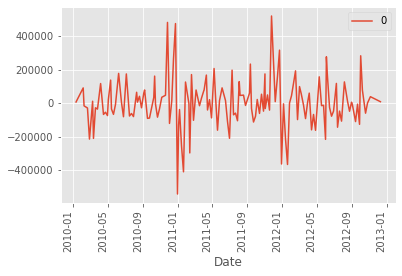

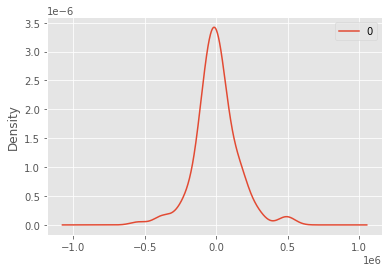

                   0
count     142.000000
mean      707.175163
std    149548.586210
min   -543118.152895
25%    -73264.565405
50%     -4764.041904
75%     59829.519148
max    520456.911635


In [171]:
model = ARIMA(store1, order=(5,1,0))
model_fit = model.fit(disp=0)
print(model_fit.summary())
# plot residual errors
residuals = DataFrame(model_fit.resid)
residuals.plot()
plt.xticks(rotation=90)
plt.show()
residuals.plot(kind='kde')
plt.show()
print(residuals.describe())

In [120]:
X = store1.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
for t in range(len(test)):
    model = ARIMA(history, order=(6,2,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)

predicted=1565548.024948, expected=2033320.660000
predicted=2024730.812096, expected=1584083.950000
predicted=1698259.858503, expected=1799682.380000
predicted=1763535.676157, expected=1881176.670000
predicted=2104708.807566, expected=2270188.990000
predicted=2003349.723421, expected=1497462.720000
predicted=1878395.822577, expected=1550369.920000
predicted=1750347.243278, expected=1459601.170000
predicted=1592189.366989, expected=1394393.840000
predicted=1114299.394986, expected=1319325.590000
predicted=1318767.180961, expected=1636339.650000
predicted=1480381.964373, expected=1802477.430000
predicted=1467779.359072, expected=1819870.000000
predicted=1820975.090314, expected=1539387.830000
predicted=1720858.665067, expected=1688420.760000
predicted=1732199.474025, expected=1675431.160000
predicted=1725402.466525, expected=1677472.780000
predicted=1664893.111928, expected=1511068.070000
predicted=1644126.942950, expected=1649604.630000
predicted=1585327.304015, expected=1899676.880000


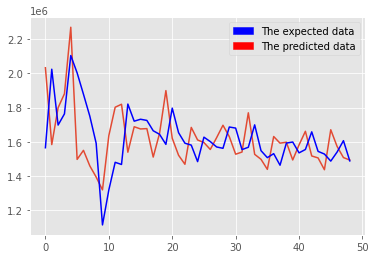

In [129]:
# Plotting the Graph
plt.plot(test)
plt.plot(predictions, color='blue')
red_patch = mpatches.Patch(color='red', label='The predicted data')
blue_patch = mpatches.Patch(color='blue', label='The expected data')
plt.legend(handles=[blue_patch,red_patch])
plt.show()

Over here the red lines is the predicted values and the blue line is the expected lines that we needed .... Close enough ....

Now let's try linear regression model. Since we can't use Date directly in linear regression, I will seperate the data column


### Trying out Linear Regression on the data

In [100]:
# define store 1 again since we changed data
store1=df[df['Store']==1]

In [101]:
X=store1.drop(columns=['Weekly_Sales'],axis=1).values
y=store1['Weekly_Sales'].values

In [116]:
# 20% test data and 80%train data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
reg=LinearRegression()

In [117]:
reg.fit(X_train,y_train)

LinearRegression()

In [118]:
pred=reg.predict(X_test)

In [119]:
print('the score using the model is :',mean_squared_error(y_test,pred))

the score using the model is : 15838677612.67665


In [110]:
# 50% test data and 50% train data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)
reg=LinearRegression()

In [107]:
reg.fit(X_train,y_train)

LinearRegression()

In [108]:
pred=reg.predict(X_test)

In [109]:
print('the score using the model is :',mean_squared_error(y_test,pred))

the score using the model is : 21345791897.380997


#### Well we got a better score than arima here ! But still not a good fit. Keep looking...

### Splitting/Scaling

In [ ]:
y = df['Holiday_Flag'].copy()
X = df.drop('Holiday_Flag', axis=1).copy()

scaler = StandardScaler()

X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7)

### Modeling and Training

In [198]:
logistic_model = LogisticRegression()
svm_model = SVC()
dec_model = DecisionTreeClassifier()

In [199]:
logistic_model.fit(X_train, y_train)
svm_model.fit(X_train, y_train)
dec_model.fit(X_train, y_train)

print("Models trained")

Models trained


#### results

In [201]:
print("   Logistic Regression Accuracy:", logistic_model.score(X_test, y_test))
print("Support Vector Machine Accuracy:", svm_model.score(X_test, y_test))
print("         Decision Tree Accuracy:", dec_model.score(X_test, y_test))

   Logistic Regression Accuracy: 0.9264629725530813
Support Vector Machine Accuracy: 0.9451061626100467
         Decision Tree Accuracy: 0.9979285344381149


Whoa! Looks like we got the most accurate results from Desicion Tree model with a 99.79% accuracy! All of the accuracies are above 90% which says our model was trained nicely. But Decision Tree did exceptionally well with the accurate result.

Some more models...KNeighborsRegressor, RandomForestRegressor, ExtraTreesRegressor

In [343]:
X_train,X_test,y_train,y_test=train_test_split( X, y, test_size=0.20, random_state=0)

In [344]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [331]:
import sklearn.metrics as metrics
from sklearn.metrics import mean_absolute_error
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=10,n_jobs=4)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)

In [332]:
print(metrics.mean_absolute_error(y_test, y_pred))
print(metrics.mean_squared_error(y_test, y_pred))
accuracy = knn.score(X_test, y_test)
print(accuracy)

0.08725718725718727
0.04174825174825175
0.3304948395716747


In [333]:
from sklearn.ensemble import RandomForestRegressor
# After Hyper-parameter tunning 
rfr = RandomForestRegressor(n_estimators = 400,max_depth=15,n_jobs=5)        
rfr.fit(X_train,y_train)
y_pred=rfr.predict(X_test)

In [334]:
print(metrics.mean_absolute_error(y_test, y_pred))
print(metrics.mean_squared_error(y_test, y_pred))
accuracy = rfr.score(X_test, y_test)
print(accuracy)

0.0005963480963480962
4.037975912975912e-05
0.9993524409769959


In [347]:
from sklearn.ensemble import ExtraTreesRegressor
etr = ExtraTreesRegressor(n_estimators=30,n_jobs=4) 
etr.fit(X_train,y_train)
y_pred=etr.predict(X_test)

In [348]:
print(metrics.mean_absolute_error(y_test, y_pred))
print(metrics.mean_squared_error(y_test, y_pred))
accuracy = etr.score(X_test, y_test)
print(accuracy)

0.001243201243201243
9.669343002676333e-05
0.9984493542203203


## A table with all the model accuracy summary

In [307]:
from prettytable import PrettyTable
    
x = PrettyTable()
x.field_names = ["Model", "Accuracy"]
x.add_row(["Logistic Regression", 92.64])
x.add_row(["KNNRegressor", 33.05])
x.add_row(["Decision Tree", 99.79])
x.add_row(["RandomForestRegressor", 99.92])
x.add_row(["ExtraTreeRegressor", 99.89])
x.add_row(["Support Vector Machine",94.51 ])
print(x)

+------------------------+----------+
|         Model          | Accuracy |
+------------------------+----------+
|  Logistic Regression   |  92.64   |
|      KNNRegressor      |  33.05   |
|     Decision Tree      |  99.79   |
| RandomForestRegressor  |  99.92   |
|   ExtraTreeRegressor   |  99.89   |
| Support Vector Machine |  94.51   |
+------------------------+----------+


## Getting averages of the best models

In [357]:
etr = ExtraTreesRegressor(n_estimators=30,n_jobs=4) 
rfr = RandomForestRegressor(n_estimators = 400,max_depth=15,n_jobs=4)
svm = SVC()
dec = DecisionTreeClassifier()

etr.fit(X_train,y_train)
rfr.fit(X_train,y_train)
svm.fit(X_train, y_train)
dec.fit(X_train, y_train)

etr_pred=etr.predict(X_test)
svm_pred=svm.predict(X_test)
dec_pred=dec.predict(X_test)
rfr_pred=rfr.predict(X_test)

In [358]:
final = (etr_pred + rfr_pred + svm_pred + dec_pred)/4.0

In [364]:
print(metrics.mean_absolute_error(y_test, final))
print(metrics.mean_squared_error(y_test, final))
print(np.sqrt(metrics.mean_squared_error(y_test, final)))

0.011246114996114996
0.002787999115082449
0.052801506750115086


Errors here are much low as compared to any individual model. Looks like getting average gives the best results and helps in reducing loss.

# Conclusion

In conclusion, we gathered the data of how holidays impact the sales. Sales weighted five times higher during the week of four most renown holidays: Thanksgiving, Christmas, Labor Day and Super Bowl.
When it comes to predicting the model for sales and demand, the best model so far to predict Walmart’s sales and demand criteria is Random Forest Regressor.
However rather than operating with individual models, this trick of simply averaging may reduce the loss to a great extent. Especially when we have the data of 20,000 Walmart stores from all across the countries!
